<a href="https://colab.research.google.com/github/beedrumms/Exploring-Public-Responses-to-Government-COVID-19-Policies/blob/main/5)_B)_NY_OxCGRT_Policy_Indices_Dataset_Transformation_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OxCGRT Policy Tracker Indices Data 

####this step comes after tweet EDA in case the dataset is too small or skewed to use

In [ ]:
# import essential packages
import pandas as pd
import numpy as np
from google.colab import drive, files
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime
# Mounting google colab on drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Importing most recent covid-19 policy tracker data from Oxford's Covid-19 Policy Tracker Github Project 
data = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/USA-covid-policy/master/data/OxCGRT_US_latest.csv') 
data

# Creating a dataset with New Yorks sub-national totals 
Filter_to_NY = data['RegionName'] == 'New York'
data_NY = data[Filter_to_NY ] 

# Filtering New York further to just state_totals (which will give me all the policies in effect at the provincial level)
filter_to_state_total = data_NY['Jurisdiction'] == 'STATE_WIDE'
data_NY2 = data_NY[filter_to_state_total]

# looking at the data values of the datasets below, date is a int dtype so I will convert both dataset values to datetime objects to better filter needed dates 
data_NY2.info()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C1_Notes,C2_Workplace closing,C2_Flag,C2_Notes,C3_Cancel public events,C3_Flag,C3_Notes,C4_Restrictions on gatherings,C4_Flag,C4_Notes,C5_Close public transport,C5_Flag,C5_Notes,C6_Stay at home requirements,C6_Flag,C6_Notes,C7_Restrictions on internal movement,C7_Flag,C7_Notes,C8_International travel controls,C8_Notes,E1_Income support,E1_Flag,E1_Notes,E2_Debt/contract relief,E2_Notes,E3_Fiscal measures,E3_Notes,E4_International support,E4_Notes,H1_Public information campaigns,H1_Flag,H1_Notes,H2_Testing policy,H2_Notes,H3_Contact tracing,H3_Notes,H4_Emergency investment in healthcare,H4_Notes,H5_Investment in vaccines,H5_Notes,H6_Facial Coverings,H6_Flag,H6_Notes,H7_Vaccination policy,H7_Flag,H7_Notes,H8_Protection of elderly people,H8_Flag,H8_Notes,M1_Wildcard,M1_Notes,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,United States,USA,NaN,NaN,NAT_GOV,20200101,0.0,NaN,NaN,0.0,NaN,No policies yet in place.,0.0,NaN,No policies yet in place.,0.0,NaN,No policies yet in place.,0.0,NaN,No public transportation system exists for thi...,0.0,NaN,No policies yet in place.,0.0,NaN,No policies yet in place.,0.0,No policies unique to the county in place. At ...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,"No announcements identified, coded at 0.",NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
1,United States,USA,NaN,NaN,NAT_GOV,20200102,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
2,United States,USA,NaN,NaN,NAT_GOV,20200103,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
3,United States,USA,NaN,NaN,NAT_GOV,20200104,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
4,United States,USA,NaN,NaN,NAT_GOV,20200105,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29947,United States,USA,Wyoming,US_WY,STATE_WIDE,20210725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64251.0,766.0,NaN,26.85,NaN,38.1,NaN,34.37,NaN,39.29,NaN,0.0
29948,United States,USA,Wyoming,US_WY,STATE_WIDE,20210726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64451.0,766.0,NaN,26.85,NaN,38.1,NaN,34.37,NaN,39.29,NaN,0.0
29949,United States,USA,Wyoming,US_WY,STATE_WIDE,20210727,NaN,NaN,NaN,N

In [ ]:
# Converting the date field to a datetime dtype for better management down the road
data_NY2['Date'] = data_NY2['Date'].astype(str) # strptime only parses from a string dtype 

Date_c = [] 
for t in data_NY2['Date']:
  Date_c.append(datetime.strptime(t, '%Y%m%d'))

data_NY2['Date'] = Date_c # overwriting the column with datetime values 

data_NY2['Date'].head(3), data_NY2['Date'].tail(3) # The output should be Jan 1s, 2020 to July 4th, 2021 (when i read the data in)

In [ ]:
# Finally, only March 1st, 2020 to June 1st, 2021 is needed so I'm just going to slice the data
policy_indices_NY = data_NY2[60:517]
policy_indices_NY.head(3)


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C1_Notes,C2_Workplace closing,C2_Flag,C2_Notes,C3_Cancel public events,C3_Flag,C3_Notes,C4_Restrictions on gatherings,C4_Flag,C4_Notes,C5_Close public transport,C5_Flag,C5_Notes,C6_Stay at home requirements,C6_Flag,C6_Notes,C7_Restrictions on internal movement,C7_Flag,C7_Notes,C8_International travel controls,C8_Notes,E1_Income support,E1_Flag,E1_Notes,E2_Debt/contract relief,E2_Notes,E3_Fiscal measures,E3_Notes,E4_International support,E4_Notes,H1_Public information campaigns,H1_Flag,H1_Notes,H2_Testing policy,H2_Notes,H3_Contact tracing,H3_Notes,H4_Emergency investment in healthcare,H4_Notes,H5_Investment in vaccines,H5_Notes,H6_Facial Coverings,H6_Flag,H6_Notes,H7_Vaccination policy,H7_Flag,H7_Notes,H8_Protection of elderly people,H8_Flag,H8_Notes,M1_Wildcard,M1_Notes,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
20220,United States,USA,New York,US_NY,STATE_WIDE,2020-03-01,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,2.0,1.0,The first of Gov Cuomo's public press conferen...,1.0,NaN,1.0,Media reports surrounding the first positive c...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,13.89,13.89,17.86,17.86,13.02,13.02,14.88,14.88,0.0,0.0
20221,United States,USA,New York,US_NY,STATE_WIDE,2020-03-02,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,2.0,1.0,NaN,1.0,NaN,1.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,13.89,13.89,17.86,17.86,13.02,13.02,14.88,14.88,0.0,0.0
20222,United States,USA,New York,US_NY,STATE_WIDE,2020-03-03,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,2.0,1.0,NaN,1.0,NaN,1.0,NaN,40000000.0,"During a novel coronavirus briefing, Governor ...",0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,0.0,13.89,13.89,17.86,17.86,13.02,13.02,14.88,14.88,0.0,0.0


Basic dataset cleaning is finished - now I will visualize the data 

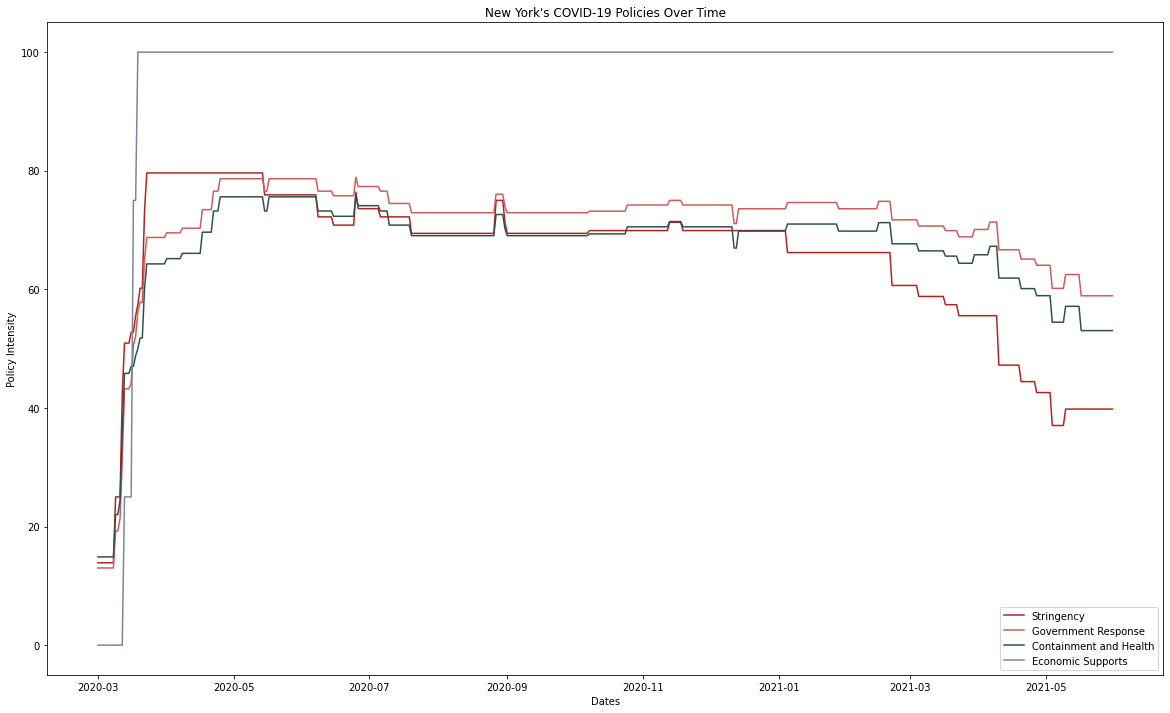

In [ ]:
import matplotlib.colors as mcolors

date_NY = policy_indices_NY['Date']
stringency_NY = policy_indices_NY['StringencyIndex']
gov_response_NY = policy_indices_NY['GovernmentResponseIndex']
containment_health_NY = policy_indices_NY['ContainmentHealthIndex']
economic_supports_NY = policy_indices_NY['EconomicSupportIndex']


plt.plot(date_NY, stringency_NY, color = 'firebrick', label = 'Stringency')
plt.plot(date_NY, gov_response_NY , color = 'indianred', label = 'Government Response')
plt.plot(date_NY, containment_health_NY, color = 'darkslategrey', label = 'Containment and Health')
plt.plot(date_NY, economic_supports_NY, color = 'lightslategrey', label = 'Economic Supports')
plt.xlabel("Dates")
plt.ylabel("Policy Intensity")
plt.title("New York's COVID-19 Policies Over Time")
plt.legend()
plt.rc('figure', figsize=(16,12))
plt.show()

These results make sense - at the provincial level there is a lot more variation across topic groups as provinces were endowed with a lot of policy flexibility throughout the pandemic. Whereas the federal government tackled things that are strictly fed jurisdiction - for example, foreign travel and vaccine procurement. 

In [ ]:
# now that the Oxford Government Tracker Data has been filtered down to needed information - I will save it back to my drive
policy_indices_NY.to_csv('/content/drive/MyDrive/Colab Notebooks/OxCGRT_New York.csv')